In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Nodes and edges tables are opened for checking.

In [17]:
net_nodes = pd.read_csv('/home/felipe/Code/datasci4health/p3/data/external/net_nodes.csv')
net_nodes.head()

,dbi,p_node,hormone,len_i,degree,color,degree-strength,label,node_bet_cent,module-louvain,module-infomap,class,rank_degree
0,DB00252,0.20,False,42794,24,#976fb0,6.51,Phenytoin,0.30,2,1,CNS agents,1
1,DB00564,0.18,False,87950,18,#976fb0,4.84,Carbamazepine,0.20,0,2,CNS agents,2
2,DB01174,0.05,False,13638,15,#976fb0,2.17,Phenobarbital,0.28,2,1,CNS agents,3
3,DB00571,0.10,False,109099,14,#ee262c,4.81,Propranolol,0.06,4,0,Cardiovascular agents,4
4,DB00682,0.13,False,57959,14,#f498b7,3.31,Warfarin,0.17,1,3,Coagulation modifiers,4


In [18]:
net_edges = pd.read_csv('/home/felipe/Code/datasci4health/p3/data/external/net_edges.csv')
net_edges.head()

,dbi,dbj,tau,severity,weight,edge_bet_cent,color,gender,patients_norm,RRI^F,patients,tau_norm,RRI^M,label_i,label_j
0,DB01174,DB00741,0.01,Moderate,1.128571,0.20,#fcb89d,Female,1.005515,1.416707,3,1.128571,0.705862,Phenobarbital,Hydrocortisone
1,DB00252,DB00741,0.02,Moderate,1.257143,0.19,#808080,Male,1.002758,0.708354,2,1.257143,1.411724,Phenytoin,Hydrocortisone
2,DB00682,DB00537,0.07,Major,1.900000,0.14,#fdc9b4,Female,1.057908,1.023178,22,1.900000,0.977347,Warfarin,Ciprofloxacin
3,DB00916,DB01174,0.04,Moderate,1.514286,0.14,#fcc3ab,Female,1.019303,1.180590,8,1.514286,0.847034,Metronidazole,Phenobarbital
4,DB01223,DB00199,0.02,Moderate,1.257143,0.14,#bc141a,Female,1.000000,126.090000,1,1.257143,0.000000,Aminophylline,Erythromycin


In [19]:
net_nodes[net_nodes['dbi'] == 'DB00741']

,dbi,p_node,hormone,len_i,degree,color,degree-strength,label,node_bet_cent,module-louvain,module-infomap,class,rank_degree
43,DB00741,0.01,False,354,3,#f2ea25,0.06,Hydrocortisone,0.2,4,1,Hormones,39


Edge colors are checked for unique files. As expected, there is a single gary shade (all channels are equal) and the remaining colors are red shades (first byte is the greatest).

In [20]:
unique_edge_colors = net_edges['color'].unique()
unique_edge_colors.sort()
unique_edge_colors

array(['#808080', '#aa9992', '#bc141a', '#bd151a', '#c6171c', '#ce1b1e',
       '#dd2924', '#e02c26', '#e22e27', '#e4bbaa', '#f34b36', '#f5523b',
       '#f5533b', '#f85f43', '#fa6647', '#fb694a', '#fb6c4c', '#fb6f4f',
       '#fb7252', '#fb7959', '#fb7b5b', '#fb7c5c', '#fc8d6d', '#fc9373',
       '#fc9777', '#fc997a', '#fc9a7b', '#fc9e80', '#fc9f81', '#fca082',
       '#fca588', '#fca689', '#fca88c', '#fca98d', '#fcaa8d', '#fcae93',
       '#fcb195', '#fcb297', '#fcb398', '#fcb499', '#fcb69b', '#fcb89d',
       '#fcbaa0', '#fcbba1', '#fcbda4', '#fcbfa6', '#fcc0a7', '#fcc1a9',
       '#fcc2aa', '#fcc3ab', '#fcc4ad', '#fdc6b0', '#fdc8b2', '#fdc9b3',
       '#fdc9b4'], dtype=object)

In [30]:
unique_rri_m = net_edges['RRI^M'].unique()
unique_rri_m.sort()
unique_rri_m

array([0.00000000e+00, 7.93103420e-03, 1.70087239e-02, 4.62860357e-02,
       1.04021775e-01, 1.17643674e-01, 1.35742701e-01, 1.41172409e-01,
       1.51256152e-01, 1.62891241e-01, 1.76465511e-01, 1.84137924e-01,
       2.01674870e-01, 2.10159573e-01, 2.18071201e-01, 2.35287348e-01,
       2.39275269e-01, 2.42009844e-01, 2.81775574e-01, 2.82344818e-01,
       2.92550052e-01, 2.93769174e-01, 3.13716464e-01, 3.24223714e-01,
       3.32170374e-01, 3.38813781e-01, 3.44322948e-01, 3.52931022e-01,
       3.70288285e-01, 3.78140381e-01, 3.79538908e-01, 4.38749562e-01,
       4.63551193e-01, 4.80277267e-01, 4.94103431e-01, 4.98255560e-01,
       5.16860732e-01, 5.24354661e-01, 5.32726071e-01, 5.59362374e-01,
       5.64689635e-01, 5.81298154e-01, 5.88218370e-01, 5.94410142e-01,
       6.20303008e-01, 6.41692767e-01, 6.51564964e-01, 6.56615855e-01,
       6.65527070e-01, 6.85101396e-01, 7.05862044e-01, 7.06362300e-01,
       7.27692829e-01, 7.41753334e-01, 7.43012678e-01, 7.52919513e-01,
      

In [57]:
unique_rri_f = net_edges['RRI^F'].unique()
unique_rri_f.sort()
unique_rri_f

array([0.00000000e+00, 7.08353713e-02, 1.77088428e-01, 1.91446950e-01,
       2.36117904e-01, 3.54176857e-01, 4.72235809e-01, 4.86993178e-01,
       5.29476513e-01, 5.31265285e-01, 5.50941777e-01, 5.61797773e-01,
       5.84748368e-01, 6.09115754e-01, 6.15959751e-01, 6.17279665e-01,
       6.22492657e-01, 6.72936028e-01, 7.08353713e-01, 7.28592391e-01,
       7.33652060e-01, 7.57205694e-01, 7.80389684e-01, 7.99427762e-01,
       8.37145298e-01, 8.75782773e-01, 8.85442142e-01, 8.91526554e-01,
       9.38163124e-01, 9.44471618e-01, 9.49193976e-01, 9.81832046e-01,
       9.91695199e-01, 9.94709470e-01, 1.01193388e+00, 1.02317759e+00,
       1.03301583e+00, 1.05110551e+00, 1.06253057e+00, 1.07348449e+00,
       1.09391333e+00, 1.09472847e+00, 1.11312726e+00, 1.13336594e+00,
       1.18058952e+00, 1.18753417e+00, 1.20938439e+00, 1.21432065e+00,
       1.21534800e+00, 1.25929549e+00, 1.26491735e+00, 1.27335013e+00,
       1.27503668e+00, 1.30176701e+00, 1.30772993e+00, 1.32816321e+00,
      

In [26]:
net_edges['RRI^F'].max(), net_edges['RRI^F'].min(), net_edges['RRI^F'].mean(), net_edges['RRI^F'].std()

(126.09, 0.0, 28.394282031450466, 50.72205641073922)

In [27]:
net_edges['RRI^M'].max(), net_edges['RRI^M'].min(), net_edges['RRI^M'].mean(), net_edges['RRI^M'].std()

(126.09, 0.0, 4.236984963985631, 20.634446364120834)

In [44]:
np.any(net_edges['RRI^F']==1)

False

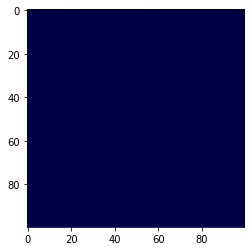

In [51]:
norm = mpl.colors.Normalize(vmin=0, vmax=255)
plt.imshow(norm((0,0,70)*np.ones((100,100,3))))

Color channel values will be scaled from 70 (0x32) to 255 (0xff), blue if risk is greater for men or red if risk is greater for women.

In [55]:
rri_max = net_edges['RRI^M'].max()

net_edges['our-color'] = np.where(
    net_edges['RRI^F'] > 1,
    net_edges['RRI^F'] * 185 / rri_max + 70,
    net_edges['RRI^M'] * 185 / rri_max + 70
).astype(int)

net_edges['our-color'] = np.where(
    net_edges['RRI^F'] > 1,
    net_edges['our-color'].apply(lambda x: '#{:02x}0000'.format(x)),
    net_edges['our-color'].apply(lambda x: '#0000{:02x}'.format(x))
)
net_edges.head()

,dbi,dbj,tau,severity,weight,edge_bet_cent,color,gender,patients_norm,RRI^F,patients,tau_norm,RRI^M,label_i,label_j,our-color
0,DB01174,DB00741,0.01,Moderate,1.128571,0.20,#fcb89d,Female,1.005515,1.416707,3,1.128571,0.705862,Phenobarbital,Hydrocortisone,#480000
1,DB00252,DB00741,0.02,Moderate,1.257143,0.19,#808080,Male,1.002758,0.708354,2,1.257143,1.411724,Phenytoin,Hydrocortisone,#000048
2,DB00682,DB00537,0.07,Major,1.900000,0.14,#fdc9b4,Female,1.057908,1.023178,22,1.900000,0.977347,Warfarin,Ciprofloxacin,#470000
3,DB00916,DB01174,0.04,Moderate,1.514286,0.14,#fcc3ab,Female,1.019303,1.180590,8,1.514286,0.847034,Metronidazole,Phenobarbital,#470000
4,DB01223,DB00199,0.02,Moderate,1.257143,0.14,#bc141a,Female,1.000000,126.090000,1,1.257143,0.000000,Aminophylline,Erythromycin,#ff0000


Then, our network file is saved.

In [56]:
net_edges.to_csv('/home/felipe/Code/datasci4health/p3/data/interim/net_edges_colored.csv', index=False)